In [1]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pandas as pd
import pathlib

In [2]:
data_dir = "C:\\Users\\tskap\\anaconda3\\PYDIR\\cat-dataset" # Datasets path
data_dir = pathlib.Path(data_dir)

In [3]:
abys = list(data_dir.glob('abys/*'))
tonkinese = list(data_dir.glob('tonkinese/*'))
balinese = list(data_dir.glob('balinese/*'))
siamese = list(data_dir.glob('siamese/*'))
persian = list(data_dir.glob('persian/*'))

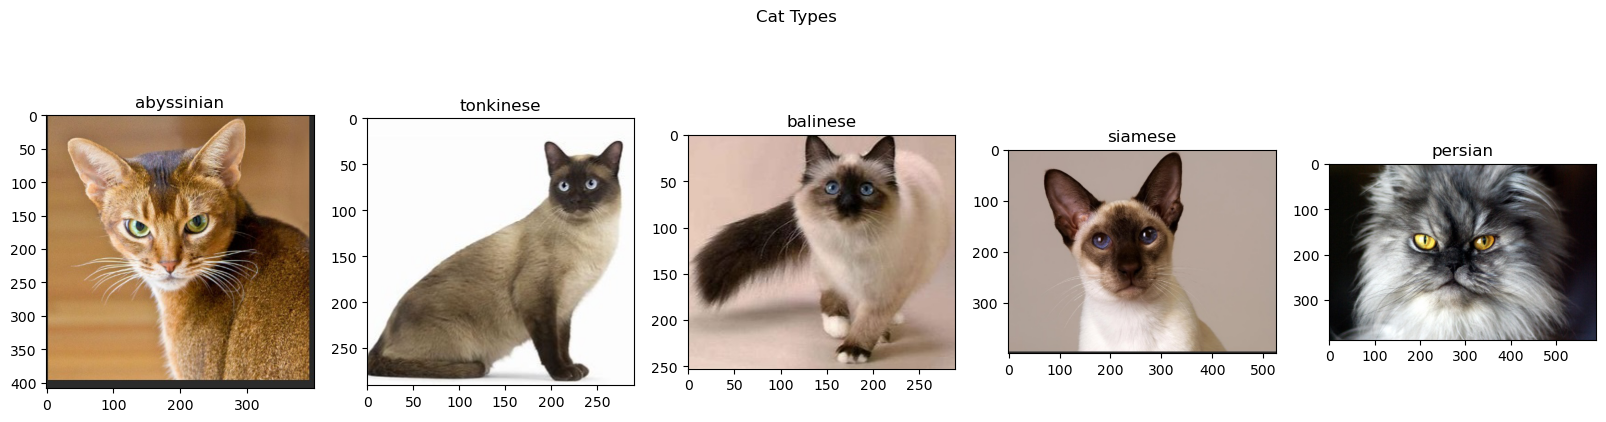

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Cat Types')

abyssinian_image = img.imread(abys[0])
ax[0].set_title('abyssinian')
ax[0].imshow(abyssinian_image)

balinese_image = img.imread(balinese[0])
ax[2].set_title('balinese')
ax[2].imshow(balinese_image)

siamese_image = img.imread(siamese[0])
ax[3].set_title('siamese')
ax[3].imshow(siamese_image)

persian_image = img.imread(persian[0])
ax[4].set_title('persian')
ax[4].imshow(persian_image)


tonkinese_image = img.imread(tonkinese[0])
ax[1].set_title('tonkinese')
ax[1].imshow(tonkinese_image)



In [5]:


# Contains the images path
df_images = {
    'abyssinian' : abys,
    'tonkinese' : tonkinese,
    'balinese' : balinese,
    'siamese' : siamese,
    'persian': persian
}

# Contains numerical labels for the categories
df_labels = {
    'abyssinian' : 0,
    'tonkinese' : 1,
    'balinese' : 2,
    'siamese' : 3,
    'persian': 4
}



In [6]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

In [7]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [10]:
num_label = 5 # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(X_train, y_train, epochs=35)

Epoch 1/35
2/2 [==============================] - 5s 148ms/step - loss: 2.0606 - acc: 0.0889
Epoch 2/35
2/2 [==============================] - 0s 108ms/step - loss: 1.6858 - acc: 0.2000
Epoch 3/35
2/2 [==============================] - 0s 105ms/step - loss: 1.4503 - acc: 0.3556
Epoch 4/35
2/2 [==============================] - 0s 108ms/step - loss: 1.2572 - acc: 0.4444
Epoch 5/35
2/2 [==============================] - 0s 108ms/step - loss: 1.0875 - acc: 0.6000
Epoch 6/35
2/2 [==============================] - 0s 126ms/step - loss: 0.9235 - acc: 0.7111
Epoch 7/35
2/2 [==============================] - 0s 123ms/step - loss: 0.7929 - acc: 0.7778
Epoch 8/35
2/2 [==============================] - 0s 102ms/step - loss: 0.6842 - acc: 0.8444
Epoch 9/35
2/2 [==============================] - 0s 117ms/step - loss: 0.5976 - acc: 0.9333
Epoch 10/35
2/2 [==============================] - 0s 125ms/step - loss: 0.5220 - acc: 0.9333
Epoch 11/35
2/2 [==============================] - 0s 111ms/step - lo

In [12]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 1s 933ms/step - loss: 0.9213 - acc: 0.8000


[0.9213067293167114, 0.800000011920929]

In [13]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 1s 722ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2

    accuracy                           0.80         5
   macro avg       0.62      0.75      0.67         5
weighted avg       0.70      0.80      0.73         5



C:\Users\tskap\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tskap\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tskap\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc']})

fig = px.line(acc, x=acc.index, y=acc['train'], title='Training Accuracy every Epoch', markers=True)
fig.show()